In [27]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the data
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()

In [9]:
dir(data), data.keys()

(['DESCR',
  'data',
  'data_module',
  'feature_names',
  'filename',
  'frame',
  'target',
  'target_names'],
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']))

In [8]:
type(data)

sklearn.utils._bunch.Bunch

In [10]:
data.data.shape

(569, 30)

In [11]:
data.target.shape

(569,)

In [13]:
data.target_names.shape

(2,)

In [14]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
data.feature_names.shape

(30,)

In [16]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.33)
N,D = x_train.shape

In [19]:
N,D

(381, 30)

In [20]:
x_train.shape

(381, 30)

In [21]:
y_train.shape

(381,)

In [22]:
x_test.shape

(188, 30)

In [23]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
#Build the model
model = nn.Linear(D, 1)

In [28]:
#Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [29]:
#Convert data into tensors
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [32]:
#Train the model
n_epochs = 1000
#create var to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_acc = np.zeros(n_epochs)
test_acc = np.zeros(n_epochs)

for it in range(n_epochs):
    #zero the parameter gradients
    optimizer.zero_grad()
    
    #forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    #Backward and optimize
    loss.backward()
    optimizer.step()
    
    #Get test loss
    outputs_test = model(x_test)
    loss_test = criterion(outputs_test,y_test)
    
    #Save losses
    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()
    
    if (it+1) % 50 == 0:
        print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():4f}, Test Loss: {loss_test.item():4f}')

Epoch 50/1000, Train Loss: 0.425136, Test Loss: 0.406057
Epoch 100/1000, Train Loss: 0.337673, Test Loss: 0.317492
Epoch 150/1000, Train Loss: 0.283254, Test Loss: 0.264884
Epoch 200/1000, Train Loss: 0.245863, Test Loss: 0.230142
Epoch 250/1000, Train Loss: 0.218515, Test Loss: 0.205597
Epoch 300/1000, Train Loss: 0.197623, Test Loss: 0.187428
Epoch 350/1000, Train Loss: 0.181135, Test Loss: 0.173500
Epoch 400/1000, Train Loss: 0.167787, Test Loss: 0.162528
Epoch 450/1000, Train Loss: 0.156756, Test Loss: 0.153693
Epoch 500/1000, Train Loss: 0.147482, Test Loss: 0.146448
Epoch 550/1000, Train Loss: 0.139572, Test Loss: 0.140416
Epoch 600/1000, Train Loss: 0.132740, Test Loss: 0.135329
Epoch 650/1000, Train Loss: 0.126775, Test Loss: 0.130993
Epoch 700/1000, Train Loss: 0.121519, Test Loss: 0.127260
Epoch 750/1000, Train Loss: 0.116848, Test Loss: 0.124020
Epoch 800/1000, Train Loss: 0.112666, Test Loss: 0.121187
Epoch 850/1000, Train Loss: 0.108899, Test Loss: 0.118694
Epoch 900/1000,

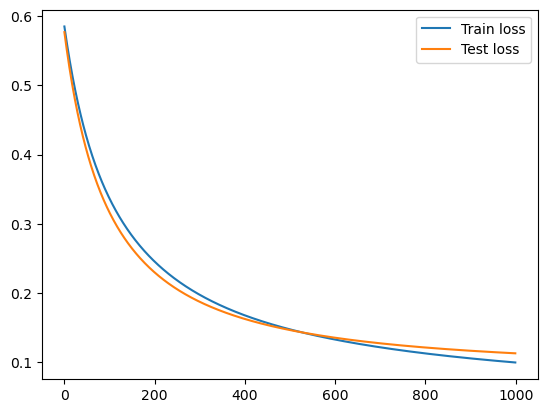

In [35]:
plt.plot(train_losses, label = 'Train loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

In [37]:
#Get accuracy
with torch.no_grad():
    p_train = model(x_train)
    p_train = (p_train.numpy() > 0)
    train_acc = np.mean(y_train.numpy() == p_train)
    
    p_test = model(x_test)
    p_test = (p_test.numpy() > 0)
    test_acc = np.mean(y_test.numpy() == p_test)
print(f'Train acc: {train_acc:4f}, Test acc: {test_acc:4f}')
    

Train acc: 0.981627, Test acc: 0.973404
